# Task3 as a Data Science Intern at The Spark Foundation 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
x=df.iloc[:,0]
y=df.iloc[:,-1]

In [7]:
print(x)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [8]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


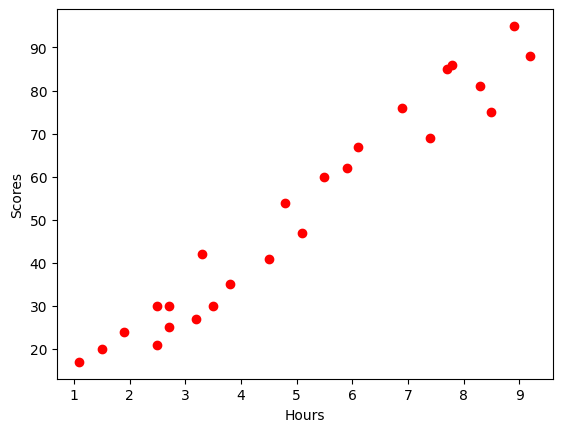

In [9]:
plt.scatter(x,y,c='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [10]:
x=np.array(x)
y=np.array(y)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [13]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

# Linear Regression

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred1=lr.predict(x_test)

In [17]:
print(y_pred1)

[[83.18814104]
 [27.03208774]
 [27.03208774]
 [69.63323162]
 [59.95115347]]


# R2_score

In [18]:
r2_score(y_test,y_pred1) # Accuracy

0.9678055545167994

In [19]:
lr.intercept_

array([2.82689235])

In [20]:
lr.coef_

array([[9.68207815]])

In [21]:
mean_squared_error(y_test,y_pred1)

18.943211722315272

In [22]:
print('mean_absolute_error',mean_absolute_error(y_test,y_pred1))

mean_absolute_error 3.9207511902099244


# Visualizing

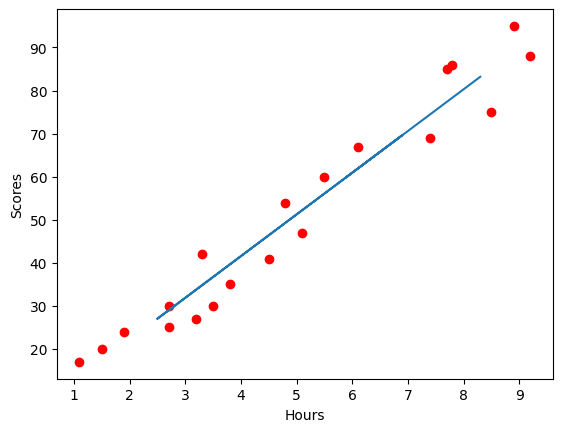

In [23]:
plt.scatter(x_train,y_train,c='red')
plt.plot(x_test,y_pred1)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

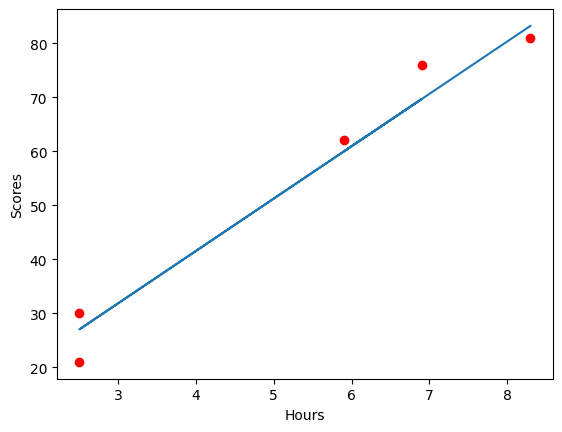

In [24]:
plt.scatter(x_test,y_test,c='red')
plt.plot(x_test,y_pred1)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# predict Score if student studies for 9.15 hrs/day? (According to Linear Regression Model)

In [47]:
pred_score=lr.predict([[9.15]])
print('pred_score if student studies for 9.15 hrs/day',pred_score)

pred_score if student studies for 9.15 hrs/day [[91.41790747]]


# Sgd Regressor

In [26]:
sgd=SGDRegressor()

In [27]:
sgd.fit(x_train,y_train)

C:\python37\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [28]:
y_pred2=sgd.predict(x_test)

# R2_score

In [29]:
r2_score(y_test,y_pred2) # better than Decision and Linear Regressor

0.9701056971716489

In [30]:
sgd.coef_

array([10.13263307])

In [31]:
sgd.intercept_

array([1.7352197])

In [32]:
print('mean_absolute_error',mean_absolute_error(y_test,y_pred2))

mean_absolute_error 3.73358629452884


# Visualizing

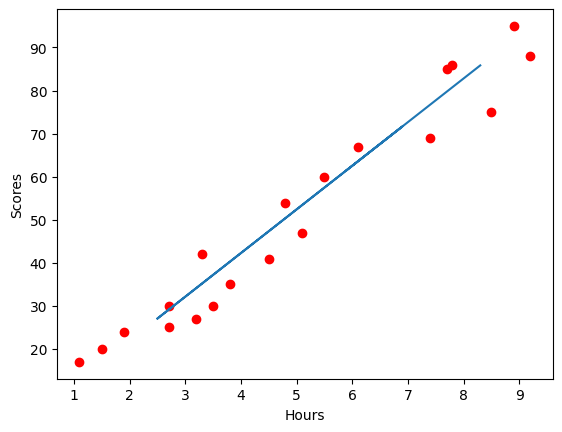

In [33]:
plt.scatter(x_train,y_train,c='red')
plt.plot(x_test,y_pred2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

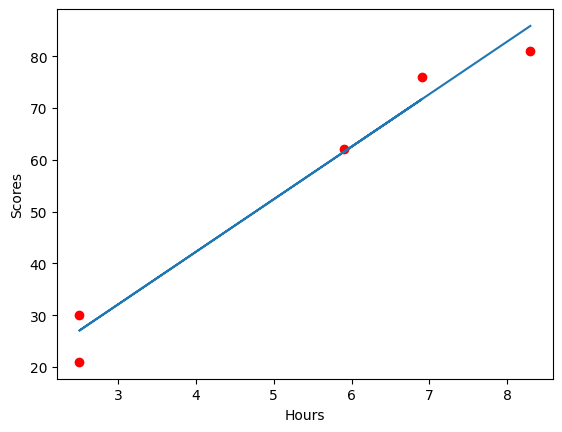

In [34]:
plt.scatter(x_test,y_test,c='red')
plt.plot(x_test,y_pred2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# predict Score if student studies for 9.15 hrs/day? (According to Linear SGD Regressor Model)

In [48]:
pred_score=sgd.predict([[9.15]])
print('pred_score if student studies for 9.15 hrs/day',pred_score) # according to SGD model

pred_score if student studies for 9.15 hrs/day [94.44881232]


# Using DecisionTreeRegressor 

In [35]:
dtr=DecisionTreeRegressor(max_depth=3)

In [36]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [37]:
y_pred3=dtr.predict(x_test)

# R2_Score

In [38]:
r2_score(y_test,y_pred3) # less accuracy than Linear,sgd Regressor

0.9512236573759347

In [39]:
print('mean_absolute_error',mean_absolute_error(y_test,y_pred3))

mean_absolute_error 4.8


In [40]:
from sklearn.tree import plot_tree 

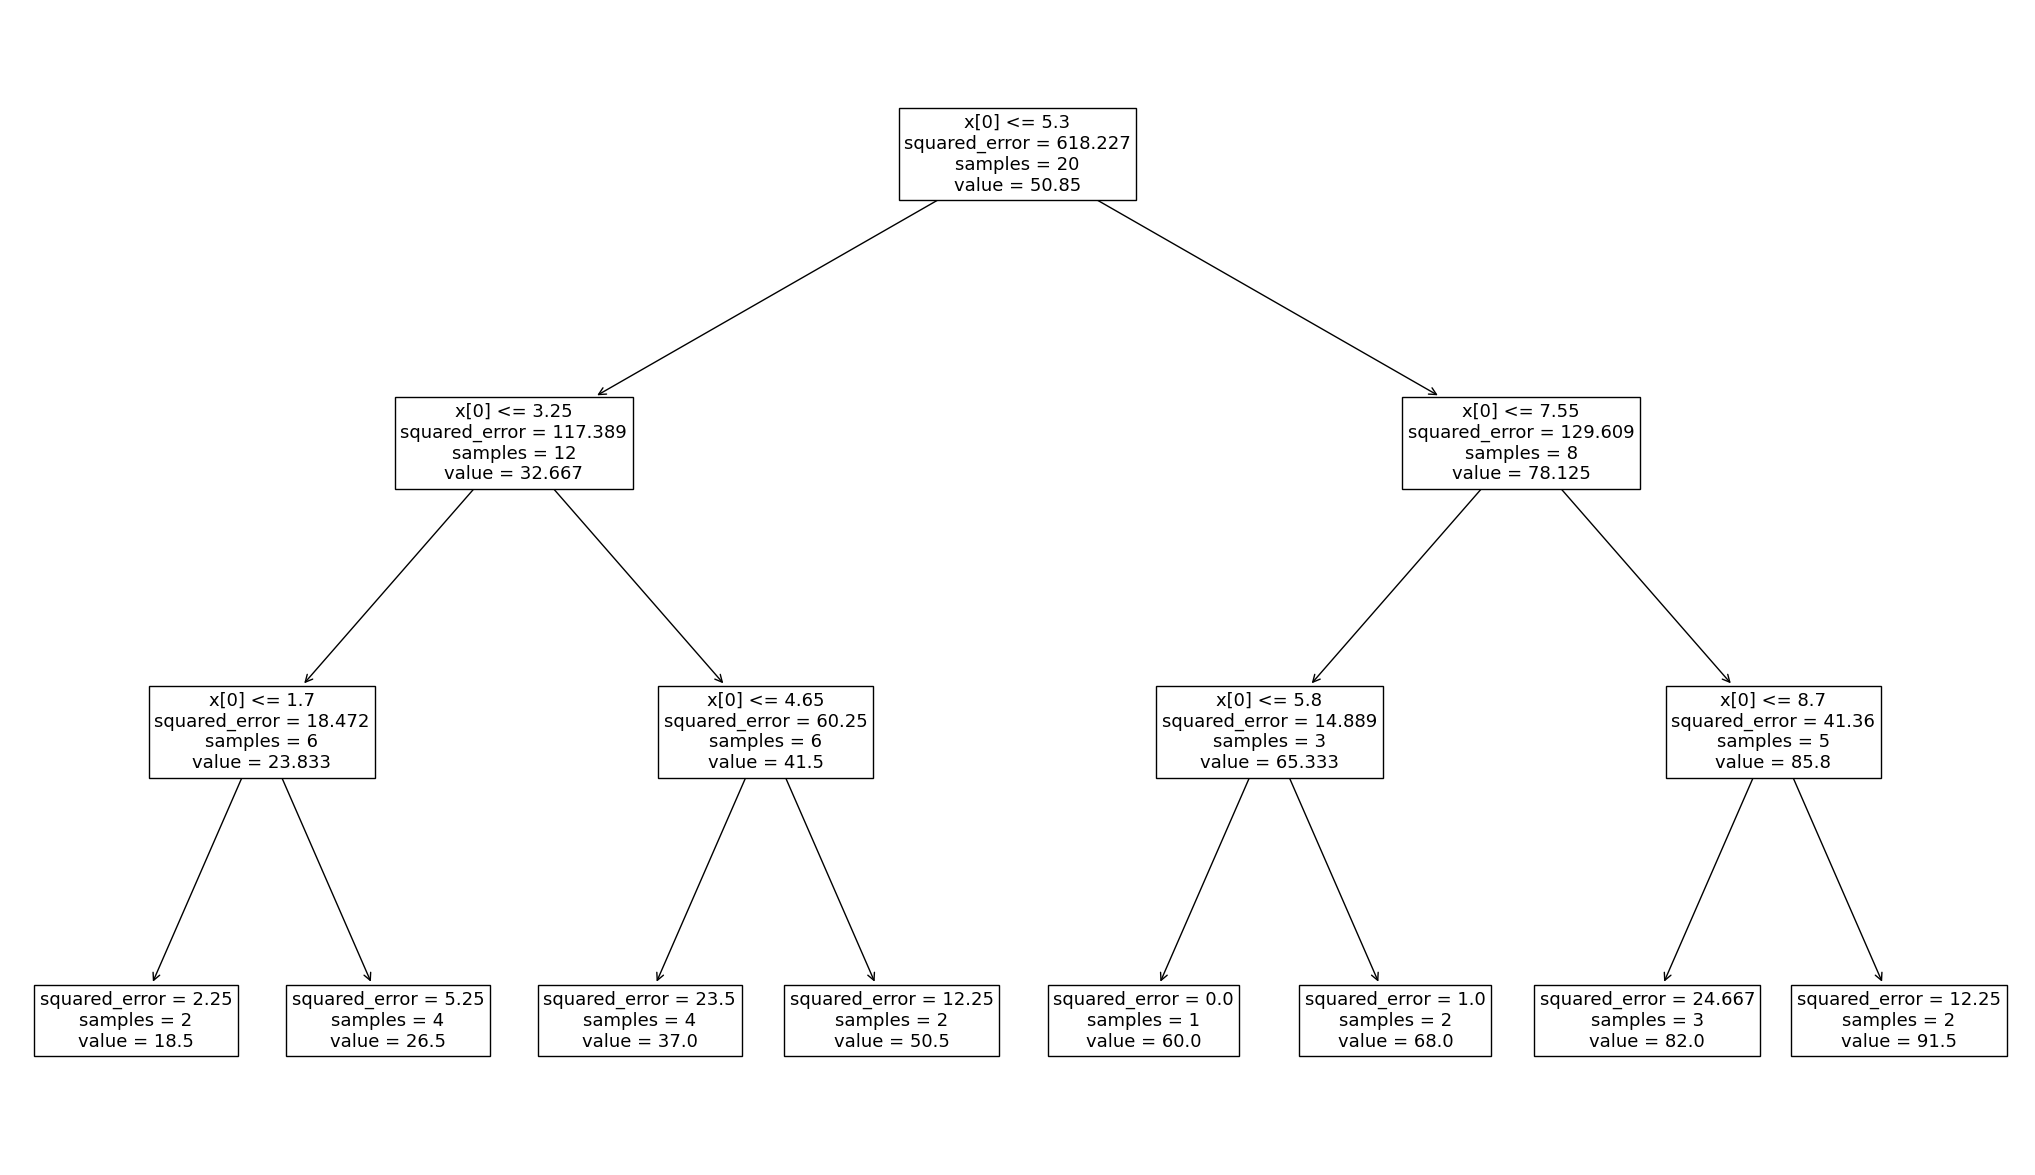

In [41]:
plt.figure(figsize=(26,15))
plot_tree(dtr,fontsize=13)
plt.show()

# predict Score if student studies for 9.15 hrs/day? (According to Decision Tree Regressor Model)

In [49]:
pred_score=dtr.predict([[9.15]])
print('pred_score if student studies for 9.15 hrs/day',pred_score) # according to Decision tree model

pred_score if student studies for 9.15 hrs/day [91.5]


# My Class

In [42]:
class ApnaGD:
    def __init__(self,LR,epoch):
        self.LR=LR
        self.m=10
        self.b=29
        self.epoch=epoch
#       
        
        
    def fit(self,x,y):
        for i in range(self.epoch):
#             y_pred=self.m*x_train+self.b
            pd_b1=-2*np.sum(y-self.m*x.ravel()-self.b)
#             print(pd_b)
            pd_m1=-2*np.sum((y-self.m*x.ravel()-self.b)*(x.ravel()))
#             print(pd_m)
            self.b=self.b - (self.LR*pd_b1)
            self.m=self.m - (self.LR*pd_m1)
        print(self.b)
        print(self.m)
#             print(y_pred)
    def predict(self,x):
        return self.m * x + self.b
            

In [43]:
gd_pred=ApnaGD(0.01,100)
gd_pred.fit(x_train,y_train)
y_pred=gd_pred.predict(x_test)

1.5889152399886975e+240
9.822864236833448e+240


# you can check cost,slop,intercept after one epoch and select the best value of slop and intercept in which we have least minimum cost value 

# Another Myclass

In [44]:
y_pred1=np.array([])

def gredient_loss(x,y):
    iteration=70
    linear_rate= 0.001 
    m=c=0.0
    n=len(x)
    for i in range(iteration):
        y_pred=m*x+c
        cost=(1/n) * sum([val**2 for val in (y-y_pred)])
        mp=-(2/n)*sum(x*(y-y_pred))
        cp=-(2/n)*sum(y-y_pred)
        
        m=m-linear_rate*(mp)
        c=c-linear_rate*(cp)
        
        print("weigth",m)
        print("intercept",c)
        print("cost",cost)
        print()
        global y_pred1
        y_pred1=np.array([])
        y_pred1=np.append(y_pred1,y_pred)
        print("pred_y_value is :",y_pred1)

# You can Check it when loss is minimum (slop and intercept value have almost samed as SGD Regressor Class)
# we have found the Slop and intercept value when we reached global minima of slop and intercept with respect to Loss 

In [45]:
x=np.array([2.5,5.1,3.2,8.5,3.5, 1.5,9.2 ,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])
y=np.array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86])
gredient_loss(x,y)

weigth 0.6357120000000002
intercept 0.10296000000000001
cost 3264.04

pred_y_value is : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
weigth 1.2306711174912004
intercept 0.19934170291200004
cost 2862.601690412808

pred_y_value is : [1.69224   3.3450912 2.1372384 5.506512  2.327952  1.056528  5.9515104
 3.599376  5.3793696 1.8193824 4.9979424 3.8536608 2.963664  2.2008096
 0.8022432 5.7607968 1.69224   1.3108128 3.9808032 4.8072288 1.8193824
 3.1543776 2.5186656 4.4893728 5.0615136]
weigth 1.7874896312296784
intercept 0.28956677222444427
cost 2510.978649660599

pred_y_value is : [ 3.2760195   6.4757644   4.13748928 10.6600462   4.50669061  2.04534838
 11.52151598  6.96803285 10.41391198  3.52215372  9.67550931  7.4603013
  5.73736173  4.26055639  1.55307993 11.15231465  3.2760195   2.53761683
  7.70643552  9.30630797  3.52215372  6.10656307  4.87589195  8.69097241
  9.79857642]
weigth 2.3086123717705553
intercept 0.37402984261654904
cost 2202.989201351535

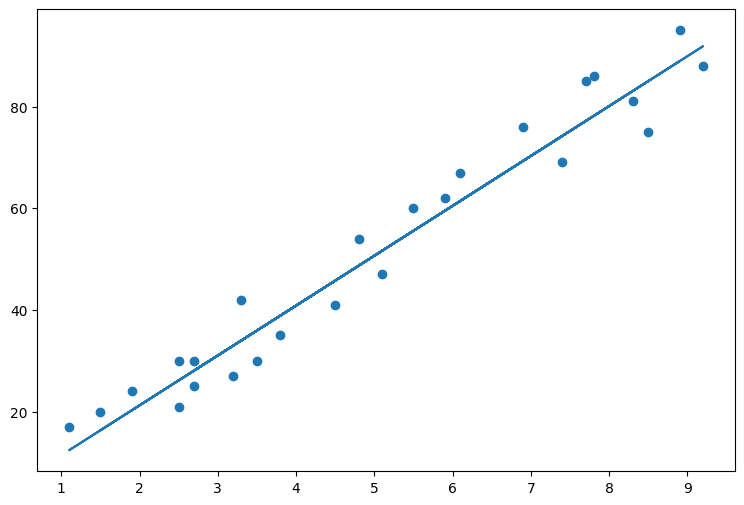

In [46]:
plt.figure(figsize=(9,6))
plt.scatter(x,y)
plt.plot(x,y_pred1)

plt.show()